# DH 2018 Machine Reading: Advanced Topics in Word Vectors

## **Welcome to Machine Reading!**

This is a hands-on workshop focusing on various word vectorization methods and applications for digital humanities.
The workshop will be split into 4 sections with 10 minute breaks in-between. The sections get incrementally more advanced, building on concepts and methods from the previous sections.

To follow along, you can run the script portions piecemeal, in order, as we progress through the workshop material.

Instructors:
- Eun Seo Jo, <a href="mailto:eunseo@stanford.edu">*eunseo@stanford.edu*</a>, Stanford University, Stanford Literary Lab
- Javier de la Rosa, <a href="mailto:versae@stanford.edu">*versae@stanford.edu*</a>, Stanford University
- Scott Bailey, <a href="mailto:scottbailey@stanford.edu">*scottbailey@stanford.edu*</a>, Stanford University


## 1. Understanding Word Vectors with Visualization (50 mins)

This unit will give a brief introduction of word vectors and word embeddings. Concepts needed to understand the internal mechanics of how they work will also be explained, with the help of plots and visualizations that are commonly used when working with them.


- 0:00 - 0:20 Sparse and dense vectors (SVD, PMI, etc.)
- 0:20 - 0:35 What to do with vectors (cosine similarity, etc.)
- 0:35 - 0:50 Visualizations (Clustering, PCA, t-SNE) 

1. What are the limitations of these word vectors?
2. What are the different use cases between count-based vectors and word2vec? (size of corpus)
3. What are limitations?
4. Why do we use Word2Vec instead?

## 2. Word Vectors via Word2Vec (50 mins)

This unit will focus on Word2Vec as an example of neural net-based approaches of vector encodings, starting with a conceptual overview of the algorithm itself and ending with an activity to train participants’ own vectors.


- 0:00 - 0:15 Conceptual explanation of Word2Vec
- 0:15 - 0:30 Word2Vec Visualization and Vectorial Features and Math
- 0:30 - 0:50 Word2Vec Construction [using Gensim] and Visualization (from part 1)


## 3. Pre-trained Models and Extended Vector Algorithms (50 mins)

This unit will explore the various flavors of word embeddings specifically tailored to sentences, word meaning, paragraph, or entire documents. We will give an overview of pre-trained embeddings, including where they can be found and how to use them.

- 0:00 - 0:15 [Out-of-vocabulary words and pre-trained embeddings](part3.ipynb#1.-Out-of-vocabulary-words-and-pre-trained-embeddings)
- 0:15 - 0:25 [Activity] Bias in pre-trained historical word embeddings
- 0:25 - 0:40 [Extending Vector Algorithms: Text Classification](part3.ipynb#2.-Extending-Vector-Algorithms:-Text-Classification)
- 0:40 - 0:50 [Activity] Authorship attribution

## 4. Role of Bias in Word Embeddings (50 mins)

In this unit, we will explore an application and caveat of using word embeddings -- cultural bias. Presenting methods and results from recent articles, we will show how word embeddings can carry the historical biases of the training corpora and lead an activity that shows these human-biases on vectors. We'll also address how such bias can be mitigated.

- 0:00 - 0:10 Algorithmic bias vs human bias 
- 0:10 - 0:40 Identifying bias in corpora (occupations, gender, ...) 
- 0:40 - 0:50 Towards unbiased embeddings; Examine “debiased” embeddings
- 0:50 - 0:60 Concluding remarks and debate


# 0. Setting Up 

Before we get started, let's go ahead and set up our notebook.

We will start by importing a few Python libraries that we will use throughout the workshop.

## What are these libraries?

1. NumPy: This is a package for scientific computing in python. For us, NumPy is useful for vector operations. 
2. NLTK: Easy to use python package for text processing (lemmatization, tokenization, POS-tagging, etc.)
3. matplotlib: Plotting package for visualization
4. scikit-learn: Easy to use python package for machine learning algorithms and preprocessing tools
5. gensim: Builtin word2vec and other NLP algorithms

We will be working with a few sample texts using NLTK's corpus package.

In [1]:
%%capture --no-stderr
import sys
!pip install Cython
!pip install -r requirements.txt
!python -m nltk.downloader all
print("All done!", file=sys.stderr)

All done!


If all went well, we should be able now to import the next packages into our workspace

In [2]:
import numpy as np
import nltk
import sklearn
import matplotlib.pyplot as plt
import gensim

In [3]:
#Why do we need to use numpy?
#numpy arrays
integer_array_1 = np.array([0,2,3])
integer_array_2 = np.array([1,1,1])

#normal python lists
normal_1 = [0,2,3]
normal_2 = [1,1,1]

In [4]:
#numpy's elementwise operation
integer_array_1 + integer_array_2

array([1, 3, 4])

In [5]:
#whereas if you use normal python lists, you would be adding them together
normal_1 + normal_2

[0, 2, 3, 1, 1, 1]

In [6]:
#to do the same thing with normal python lists, I have to...
elementwise_add = []
for _ in range(len(normal_1)):
    added = normal_1[_] + normal_2[_]
    elementwise_add.append(added)
elementwise_add

[1, 3, 4]

In [7]:
#numpy broadcasting
matrix1 = np.random.randn(3,4)
matrix1

array([[ 0.65894866, -0.23704108,  1.13882171,  1.13872803],
       [ 0.16383106,  0.49313628, -0.26480012, -0.62776723],
       [-0.01748931,  1.37950122,  0.34485037, -0.59109091]])

In [8]:
to_add = np.array([5,0,5,0])

In [9]:
matrix1 * to_add

array([[ 3.29474329, -0.        ,  5.69410856,  0.        ],
       [ 0.81915531,  0.        , -1.3240006 , -0.        ],
       [-0.08744656,  0.        ,  1.72425184, -0.        ]])



---



# 1. Understanding Word Vectors with Visualization



## What is a word vector?

A word vector or embedding is a **numerical representation** of a word within a corpus based on co-occurence with other words. Linguists have found that much of the meaning of a word can be derived from looking at its surrounding context. In this unit, we will explore a few major approaches to representing words in a numerical format.

## What is a vector?

Before anything related to words or text let's make sure we're on the same page about vectors! A vector is just a list/array of real numbers. A vector has a size/length which indicates how many numbers are in it. In Python you can make a vector using square brackets '[]'.

In [10]:
# 
vector_one = [1, 2, 3]
vector_two = [1, 2, 34.53222222]
vector_three = [-2494, 3, 48.2934, -0.49484]

Here is a list of 5 real numbers (represented as floating point numbers). This vector has 5 dimensions or features. Unlike formal vectors, Python lists can contain different types of elements and do not support vector operations broadly. NumPy provides a numerical engine with proper vector/array implementations.

In [11]:
# Here you can generate a vector of random floats with the random function from numpy
# You'll see that every time you run this command you get a series of different numbers - try it!
# In this instance we're making a vector of length (or size) 5

vector_of_floats = np.random.randn(5)
vector_of_floats

array([-0.88625342,  1.09710147, -0.61847433,  0.1048603 ,  0.20276522])

Here is a list of 20 integers between 0 and 3 (exclusive; not including 3). Later we will go into more vector math but you can see that a vector is a multi-dimensional numerical representation.

In [12]:
# You can call a vector of random integers too
# There are three inputs here: the start range of your integer, 
# the end range(exclusive), and the size of the vector
# In our example, the range is [0, 3)

vector_of_ints = np.random.randint(0, 3, size=100)
vector_of_ints

array([0, 0, 1, 0, 2, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2])

In [13]:
# Activity: Try making vectors of your own here!
my_vector = np.random.randint(5, 55, size=1000)
my_vector

array([15,  7, 41, 35, 49, 19, 43, 46, 44, 25, 29, 34, 37, 11, 20, 43, 37,
       16, 16, 17,  5, 23, 20, 54, 53, 53, 18, 31, 48,  9, 45, 17, 22, 23,
       36, 43, 39, 10, 52, 52, 16, 49, 16, 53, 51, 28, 27, 49, 47,  6, 37,
       39, 18, 30, 15, 39, 27, 37, 32, 53, 28, 25, 22, 30, 13, 22, 12, 11,
       27, 46, 14, 51, 20,  8, 41, 29, 41, 45, 41, 47, 33, 15, 44, 15, 23,
       39, 30, 29, 18, 15, 52, 35, 26, 46, 15, 36, 40, 22, 42, 10, 38, 42,
       48, 50, 32, 44, 37, 32, 32,  7, 23, 53, 42, 39, 28, 42,  5, 30, 34,
       42, 22, 30, 29, 21, 36, 27, 18, 18, 53, 44, 34, 11, 30, 51, 23, 31,
       38, 32, 20, 18, 37,  5, 16, 51, 39,  5, 49,  7,  9, 37,  7, 48, 32,
       36, 52, 10, 25,  6, 10, 29, 50, 17, 34, 25, 53, 19, 46, 37, 11, 14,
       13, 25, 45, 25, 40, 51,  8, 19, 21, 27, 43, 19, 37, 31, 38, 16, 28,
       16, 22, 38, 14, 25, 26, 20, 34,  5, 26, 50, 11, 20, 41,  6, 45, 24,
       50, 35, 17, 44, 21, 35, 35, 29, 49, 24, 31,  6, 41, 21, 39, 21, 32,
       17, 42, 35,  9, 30

Word vectors (and vectors in general) can be largely classified into **sparse** and **dense** vectors.

A sparse vector is count-based vector where each element in the vector represent the integer counts of words, usually co-occurence or frequecy. Because a lot of words don't appear all the time, many elements of sparse vectors are 0, to represent 0 observations.

There are a few examples of sparse vectors we will examine here. 


**Sparse vectors vs. Dense Vectors**
1. Sparse have lots of zeros (usually the size of sparse vectors is the size of the vocabulary)
2. They are also big for this reason
3. Dense vectors are denser (smaller)
4. Non-count-based operations have been done on dense vectors (even if it came from counting)
5. Benefit of sparse vectors is that you can readily interpret the meaning of each element
6. Dense vectors, this isn't case. (With a sparse vector you can say something like "oh, this means 'life' co-occurs 5 times with 'happiness'". It's less meaningful to say, with dense vectors, "oh, 'life's first dimension means -5")
7. Dense vectors are smaller, easier to work with.
8. There are different types of sparse vectors. A word-word matrix is one of them, a document-term matrix gives you a set too. 
9. There are different types of dense vectors too. You can use SVD to get the most informative dimensions, this can be derived from a count-based vector/sparse vector. You can also make dense vectors via prediction methods such as neural networks (eg. Word2Vec).





## Document-term matrix

One of the simplest and most common ways of constructing a matrix is recording its occurence through out a set of documents. This creates a document-term matrix where one dimension indicates the frequency of a word in documents and the other indicates the vocabulary (all words that occur at least once in your entire corpus).

Among the many packages that help you construct your own matrix with your corpus, `scikit-learn` is one of the most heavily used within the Python scientific stack. Let's import `scikit-learn`'s `CountVectorizer()` 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
# Imagine you have a document that is just a sentence like this...

documents = [
    "This is a piece of text. This is also some random text. Also text.",
]

Let's now transform this document so that each word is given a unique identifying number.

In [16]:
example_vectorizer = CountVectorizer() #initialize your count vectorizer
example_vectorizer.fit(documents) #documents much be a vector of strings(individual documents)
print("Vocabulary size:", len(example_vectorizer.vocabulary_))
example_vectorizer.vocabulary_  #We can get the unique vocabulary set and its corresponding index here

Vocabulary size: 8


{'this': 7,
 'is': 1,
 'piece': 3,
 'of': 2,
 'text': 6,
 'also': 0,
 'some': 5,
 'random': 4}

Also, we add the corresponding frequency number, which gives the total number of times each word appears in each document.

In [17]:
counts = example_vectorizer.transform(documents)
print(counts)
print("   ↑  ↑         ↑\n  doc word_id count")

  (0, 0)	2
  (0, 1)	2
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	3
  (0, 7)	2
   ↑  ↑         ↑
  doc word_id count


Now, let's iterate through all the words that appear in our original document and print all the counts that we generated above.

In [18]:
doc = 0  # first document
for word, word_id in example_vectorizer.vocabulary_.items():
    print(word, ":", counts[doc, word_id])

this : 2
is : 2
piece : 1
of : 1
text : 3
also : 2
some : 1
random : 1


A **document-term matrix** is just a big table (formally, a mathematical matrix) that describes the frequency of words or terms that occur in a collection of documents. In a document-term matrix, **rows correspond to documents** in the collection and **columns correspond to terms**. In 

In our case, since we only have one document, our document-term matrix only has one row (doc `0`) and looks like this.

|             | also | is | of | piece | random | some | text | this |
| ----------- |:----:|:--:|:--:|:-----:|:------:|:----:|:----:|:----:|
| Document #0 |  2   | 2  | 1  | 1     |  1     |  1   |  3   |   2  |

It can easily be extracted by using the `transform()` method of our `CountVectorizer()`.

In [19]:
counts = example_vectorizer.transform(documents)
counts.toarray()

array([[2, 2, 1, 1, 1, 1, 3, 2]])

Each element of the matrix represents vocabulary from above, with the placement corresponding to the unique identifier assigned by scikit-learn, eg. 7th placement (6th, starting from 0) is `text`.

Let's now add a new document that looks almost identical but introduces a new word, just to see how this change reflects on the document-term matrix.

In [20]:
documents = [
    "This is a piece of text. This is also some random text. Also text.",
    "This is a piece of text. This is also some random text. Also new text.",
]
example_vectorizer.fit(documents)
print("Vocabulary size:", len(example_vectorizer.vocabulary_))
example_vectorizer.vocabulary_

Vocabulary size: 9


{'this': 8,
 'is': 1,
 'piece': 4,
 'of': 3,
 'text': 7,
 'also': 0,
 'some': 6,
 'random': 5,
 'new': 2}

In [21]:
counts = example_vectorizer.transform(documents)
print(counts)
print("   ↑  ↑         ↑\n  doc word_id count")

  (0, 0)	2
  (0, 1)	2
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 6)	1
  (0, 7)	3
  (0, 8)	2
  (1, 0)	2
  (1, 1)	2
  (1, 2)	1
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	3
  (1, 8)	2
   ↑  ↑         ↑
  doc word_id count


In [22]:
counts = example_vectorizer.transform(documents)
counts.toarray()

array([[2, 2, 0, 1, 1, 1, 1, 3, 2],
       [2, 2, 1, 1, 1, 1, 1, 3, 2]])

Now with two documents our matrix looks like this. 

|             | also | is | new | of | piece | random | some | text | this |
| ----------- |:----:|:--:|:---:|:--:|:-----:|:------:|:----:|:----:|:----:|
| Document #0 |  2   | 2  |  0  | 1  | 1     |  1     |  1   |  3   |   2  |
| Document #1 |  2   | 2  |  1  | 1  | 1     |  1     |  1   |  3   |   2  |

Apart from the fact that the vocabulary size is now bigger, just by looking at the document-term matrix we can easily spot that one of our documents has one word more than the other. Certainly, we can spot the difference at column 3 (2 in zero-index Python sequences), which corresponds to the new word introduced, `new`, in our vocabulary. You can see there is also an additional column for the additional document (document 2). You can induce what the matrix would look like with lots more documents and a bigger vocabulary!

By now, you might have noticed that 1-letter words are being ignored. That's due to the way `CountVectorizer()` splits sentences into words. `CountVectorizer()` has options to customize this behaviour and it allows to specify your own regular expression to extract words, disregard stopwords, count ngrams instead of words, cap the max number of words to count, normalize spelling, or count terms within a frequency range. It is worth exploring the [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

Here, we have written up a temporary new regular expression that takes into account 1-letter words, so our `CountVectorizer()` can count 'a' as a vocabulary term. As such you can modify the regex to fix you needs.

In [23]:
#Lots of library functions will often have a default setting. You must check the documentation online to make sure you're using the settings that you want. 
#In this case, our function's default was to ignore single chracter words.
new_regex = r"(?u)\b\w+\b"  # this regex now considers single character tokens
CountVectorizer(token_pattern=new_regex).fit(documents).vocabulary_ #this is a new, optional parameter for this function

{'this': 9,
 'is': 2,
 'a': 0,
 'piece': 5,
 'of': 4,
 'text': 8,
 'also': 1,
 'some': 7,
 'random': 6,
 'new': 3}

In [24]:
#Activity: Make your own corpus of documents and see what kind of doc-term matrix you can generate!

my_corpus = ['this is our trial document','hello good bye random word blue green purple','i wonder if other people feel the same', 'new','new','new']
my_corpus = ['i love life i love life i love life', 'i love life i love life i love life']
new_regex = r"(?u)\b\w+\b"
my_vectorizer = CountVectorizer(token_pattern=new_regex)
my_vectorizer.fit(my_corpus) 
my_vectorizer.transform(my_corpus).toarray()
#how can I construct a corpus such that this matrix only has 3 columns; every element in the matrix is 3; no. of rows has to be 2

array([[3, 3, 3],
       [3, 3, 3]])

OK, since we have vectorized lots of text humans have generated we will now turn to some canons. 

**Let's now play with three texts/documents in our corpus, taken from literature. ** 

We will use Moby Dick, Emma, and Parents as our example texts in our corpus.
Each text is treated as a document.

In [25]:
from nltk.corpus import gutenberg

In [26]:
gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [27]:
#raw means plain text

mobydick = gutenberg.raw('melville-moby_dick.txt')
emma = gutenberg.raw('austen-emma.txt')
alice = gutenberg.raw('carroll-alice.txt')

#number of tokens in mody dick
len(mobydick.split())

212030

In [28]:
#emma looks like this
print(emma)

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died too long ago for her to have more than an indistinct
remembrance of her caresses; and her place had been supplied
by an excellent woman as governess, who had fallen little short
of a mother in affection.

Sixteen years had Miss Taylor been in Mr. Woodhouse's family,
less as a governess than a friend, very fond of both daughters,
but particularly of Emma.  Between _them_ it was more the intimacy
of sisters.  Even before Miss Taylor had ceased to hold the nominal
office of governess, the mildness o

In [29]:
corpus = [mobydick, emma, alice]

In [30]:
# We do the same thing as above 
lit_vectorizer = CountVectorizer(token_pattern=new_regex)
lit_vectorizer.fit(corpus)
print("Vocabulary size:", len(lit_vectorizer.vocabulary_))
lit_vectorizer.vocabulary_

Vocabulary size: 19918


{'moby': 11293,
 'dick': 5069,
 'by': 2661,
 'herman': 8441,
 'melville': 11046,
 '1851': 83,
 'etymology': 6264,
 'supplied': 17060,
 'a': 364,
 'late': 10165,
 'consumptive': 3966,
 'usher': 18842,
 'to': 17766,
 'grammar': 7849,
 'school': 15127,
 'the': 17520,
 'pale': 12385,
 'threadbare': 17611,
 'in': 9061,
 'coat': 3452,
 'heart': 8327,
 'body': 2223,
 'and': 979,
 'brain': 2362,
 'i': 8832,
 'see': 15291,
 'him': 8502,
 'now': 11867,
 'he': 8291,
 'was': 19302,
 'ever': 6291,
 'dusting': 5692,
 'his': 8525,
 'old': 12054,
 'lexicons': 10338,
 'grammars': 7851,
 'with': 19658,
 'queer': 13872,
 'handkerchief': 8139,
 'mockingly': 11300,
 'embellished': 5923,
 'all': 828,
 'gay': 7568,
 'flags': 6958,
 'of': 12015,
 'known': 10033,
 'nations': 11639,
 'world': 19752,
 'loved': 10603,
 'dust': 5691,
 'it': 9710,
 'somehow': 16158,
 'mildly': 11160,
 'reminded': 14343,
 'mortality': 11410,
 'while': 19504,
 'you': 19889,
 'take': 17284,
 'hand': 8131,
 'others': 12188,
 'teach': 1

To get the ID of a given vocab term:

In [31]:
print("The ID of the word 'piece' is ", str(lit_vectorizer.vocabulary_.get('piece')))

The ID of the word 'piece' is  12886


In [32]:
X = lit_vectorizer.fit_transform(corpus)

This is what the doc-term matrix looks like for our three document corpus.

In [33]:
X = X.toarray()
X #Remember each row corresponds to each document (novel) and each column is each word from our combined vocabulary


array([[20,  2,  4, ...,  3,  2,  1],
       [ 2,  0,  2, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

The dimensions of the matrix are given by the shape property.

In [34]:
X.shape # How many novels are there?   # How big is our vocabulary?


(3, 19918)

In [35]:
print("The doc-term matrix has {} documents and {} dimensions.".format(str(X.shape[0]), str(X.shape[1])))

The doc-term matrix has 3 documents and 19918 dimensions.


In [36]:
# You can look up all the words in the vocab from the three novels
lit_vectorizer.get_feature_names() 

['000',
 '1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '14',
 '144',
 '1492',
 '15',
 '150',
 '15th',
 '16',
 '1652',
 '1668',
 '1671',
 '1690',
 '1695',
 '16th',
 '17',
 '1726',
 '1729',
 '1750',
 '1772',
 '1775',
 '1776',
 '1778',
 '1779',
 '1788',
 '1791',
 '1793',
 '18',
 '180',
 '1807',
 '1816',
 '1819',
 '1820',
 '1821',
 '1825',
 '1828',
 '1833',
 '1836',
 '1839',
 '1840',
 '1842',
 '1846',
 '1850',
 '1851',
 '1865',
 '19',
 '1st',
 '2',
 '20',
 '2000',
 '200th',
 '21',
 '21st',
 '22',
 '23',
 '23rd',
 '24',
 '24th',
 '25',
 '26',
 '26th',
 '27',
 '275th',
 '28',
 '28th',
 '29',
 '2nd',
 '3',
 '30',
 '31',
 '31st',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '3d',
 '4',
 '40',
 '400',
 '41',
 '4

Let's get vocab IDs for 'happy', 'sad', 'angry'

In [37]:
print(lit_vectorizer.vocabulary_.get('happy'))
print(lit_vectorizer.vocabulary_.get('sad'))
print(lit_vectorizer.vocabulary_.get('angry'))
print(lit_vectorizer.vocabulary_.get('queer'))
print(lit_vectorizer.vocabulary_.get('handkerchief'))

8172
14929
994
13872
8139


In [38]:
#Using python slicing, you can grab by columns
X[:,8860], X[:,16233], X[:,1059], X[:,15070], X[:,8823]
# before comma (first dimension; dimension of novels)
    # We want the entire column (all novels)
# after comma (second dimension; dimension of the words)
    # We only want one column (not all words, just the select word)
#This is one way of making word vectors. 
#What kind of information do you think these vectors represent?
#Novels are in order of [moby dick, emma, alice in wonderland]

(array([1, 0, 1], dtype=int64),
 array([10,  0,  1], dtype=int64),
 array([3, 0, 0], dtype=int64),
 array([116, 108,  14], dtype=int64),
 array([2, 0, 0], dtype=int64))

Text(0.5,1,'Frequecy of "queer" in Novels')

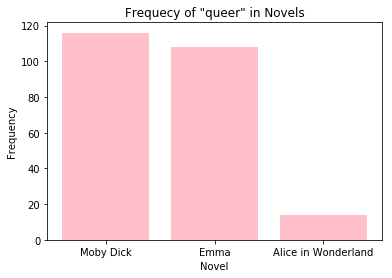

In [39]:
freq_of_queer = X[:,15070]
x = [0,1,2] #you can also do np.arange(len(X[:,15070]))
plt.bar(x, freq_of_queer, color="pink") #this is the most important part!
plt.xticks(x, ('Moby Dick', 'Emma', 'Alice in Wonderland'))
plt.xlabel('Novel')
plt.ylabel('Frequency')
plt.title('Frequecy of "queer" in Novels')

Text(0.5,1,'Frequecy of Select Words in Alice in Wonderland')

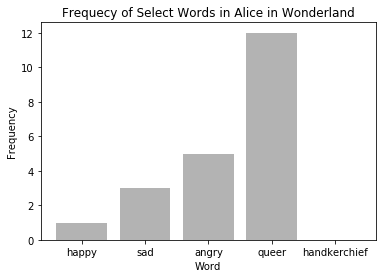

In [40]:
#How would you graph a chart titled : "Frequency of words X, Y, Z in novel N"
freq = [X[2,8172], X[2,14929], X[2,994], X[2,13872], X[2,8139]] #frequency for happy, sad, angry, queer, handkerchief only for Alice
# [2: alice, 8172: frequecy of happy]
x = [0,1,2,3,4] #you can also do np.arange(len(freq))
plt.bar(x, freq, color="0.7") #this is the most important part!
plt.xticks(x, ('happy', 'sad', 'angry', 'queer', 'handkerchief'))
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Frequecy of Select Words in Alice in Wonderland')


You may be wondering, well that wasn't fair since some novels are longer than others. In that case, we divide all frequencies by the length of respective novels (normalize) so that we get relative frequencies.


In [41]:
length_of_novels = np.array([len(mobydick.split()), 
                            len(emma.split()), 
                            len(alice.split())])

print("length of novels: ", length_of_novels) #How long these novels are
print("original: \n", X)
normalized_X = X/length_of_novels.reshape(3,1) #thanks broadcasting
normalized_X

length of novels:  [212030 158167  26443]
original: 
 [[20  2  4 ...  3  2  1]
 [ 2  0  2 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


array([[9.43262746e-05, 9.43262746e-06, 1.88652549e-05, ...,
        1.41489412e-05, 9.43262746e-06, 4.71631373e-06],
       [1.26448627e-05, 0.00000000e+00, 1.26448627e-05, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

Text(0.5,1,'Normalized Frequecy of "queer" in Novels')

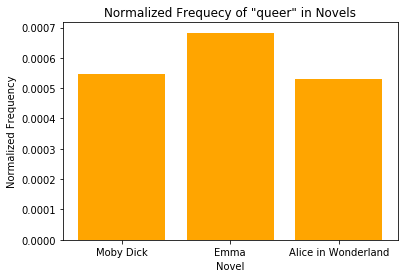

In [42]:
freq_of_queer = normalized_X[:,15070]
x = [0,1,2] #you can also do np.arange(len(X[:,15070])) more generically
plt.bar(x, freq_of_queer, color="orange") #this is the most important part!
plt.xticks(x, ('Moby Dick', 'Emma', 'Alice in Wonderland'))
plt.xlabel('Novel')
plt.ylabel('Normalized Frequency')
plt.title('Normalized Frequecy of "queer" in Novels')

In [43]:
#In another instance, you could treat each sentence as one document

from nltk import sent_tokenize
sentences = []
for novel in ['melville-moby_dick.txt', 'austen-emma.txt', 'edgeworth-parents.txt']:
    sentences += sent_tokenize(gutenberg.raw(novel))
len(sentences)

27441

In [44]:
# sentences as documents now
lit_vectorizer = CountVectorizer(token_pattern=new_regex)
X = lit_vectorizer.fit_transform(sentences).toarray()
X.shape

(27441, 21615)

In [45]:
X #Here you will notice most of these elements are zeros! Why?

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [46]:
#happy, sad, angry
X[:,8860], X[:,16233], X[:,1059] 

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [47]:
np.set_printoptions(threshold=np.inf)
print(X[:,8860]) # let's see all the zeros!

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [48]:
print('There are '+str(len(X[:,8860]))+' total elements since there were this many sentneces total')

There are 27441 total elements since there were this many sentneces total


In [49]:
print("... and of these " + str(len(np.where(X[:,8860]>0)[0])) + " have non-zero entries.")
#What does that mean about this word?

... and of these 185 have non-zero entries.


In [50]:
print("In total this word appears " + str(np.sum(X[:,8860])) + " times.")
#What does that say about this word?

In total this word appears 190 times.


Doc-term matrices are used in information retrieval for finding documents that are most relevant to a query. If you look at each row (rather than column) you get a numerical representation of a document by the words that appear in it. 

In [51]:
#Just putting this back normal print options
np.set_printoptions(threshold=10)

## Word-word Matrix

In the previous section we looked at representing words by their relations to a corpus of documents. What about their relation to one another? The most intuitive way of doing this is to build a word-word matrix where now both dimensions are the vocab and each element at [**k**][**l**] represents the co-occurence of the vocab **k** with vocab **l** in a window of **w**. The window of **w** indicates the number of words before and after given word **k** where we count occurrneces of **l**. **w** is usually around 4. 

In [52]:
from nltk.tokenize import word_tokenize
import coocc #look for this file in our directory

In [53]:
a = ['a c b c b c a d d a c c a d c b a d c']

v, m = coocc.ww_matrix(a, word_tokenize, 2) #This is not the most efficient function, sorry  
m.toarray(), v
#How do you interpret this matrix? #Also, notice anything interesting?

(array([[0., 9., 3., 6.],
        [9., 6., 5., 5.],
        [3., 5., 2., 2.],
        [6., 5., 2., 2.]]), {'a': 0, 'c': 1, 'b': 2, 'd': 3})

In [54]:
#Doing this for mobydick
mobydick = gutenberg.raw('melville-moby_dick.txt')
v, m = coocc.ww_matrix([mobydick], word_tokenize, 4) 
#v is vocabulary dictionary; m is the matrix
X = m.toarray()
X

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  2., 84., ...,  0.,  0.,  0.],
       [ 1., 84.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [55]:
v #vocabulary dictionary

{'[': 0,
 'Moby': 1,
 'Dick': 2,
 'by': 3,
 'Herman': 4,
 'Melville': 5,
 '1851': 6,
 ']': 7,
 'ETYMOLOGY': 8,
 '.': 9,
 '(': 10,
 'Supplied': 11,
 'a': 12,
 'Late': 13,
 'Consumptive': 14,
 'Usher': 15,
 'to': 16,
 'Grammar': 17,
 'School': 18,
 ')': 19,
 'The': 20,
 'pale': 21,
 '--': 22,
 'threadbare': 23,
 'in': 24,
 'coat': 25,
 ',': 26,
 'heart': 27,
 'body': 28,
 'and': 29,
 'brain': 30,
 ';': 31,
 'I': 32,
 'see': 33,
 'him': 34,
 'now': 35,
 'He': 36,
 'was': 37,
 'ever': 38,
 'dusting': 39,
 'his': 40,
 'old': 41,
 'lexicons': 42,
 'grammars': 43,
 'with': 44,
 'queer': 45,
 'handkerchief': 46,
 'mockingly': 47,
 'embellished': 48,
 'all': 49,
 'the': 50,
 'gay': 51,
 'flags': 52,
 'of': 53,
 'known': 54,
 'nations': 55,
 'world': 56,
 'loved': 57,
 'dust': 58,
 'it': 59,
 'somehow': 60,
 'mildly': 61,
 'reminded': 62,
 'mortality': 63,
 '``': 64,
 'While': 65,
 'you': 66,
 'take': 67,
 'hand': 68,
 'school': 69,
 'others': 70,
 'teach': 71,
 'them': 72,
 'what': 73,
 'name':

In [56]:
X = m.toarray()
#What is the shape of this matrix?
X.shape


(20755, 20755)

In [57]:
#Now, say we want to the word vectors for 'happy','sad','angry' again
#We need to first get the indices
happy_i = v['happy']
sad_i = v['sad']
angry_i = v['angry']


In [58]:
happy_ww = X[happy_i,:] #because this is symmetric, it doesn't matter if you get the row or the column
sad_ww = X[sad_i,:]
angry_ww = X[angry_i,:]
np.set_printoptions(threshold=np.inf)
happy_ww  #looking at this vector for happy... 

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 4., 0., 2., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 2., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 3., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0.

In [59]:
#You can look up the co-occurrence of two words within a window
#How many times does dark occur with night in a window of 4?

dark_i = v['dark']
stormy_i = v['stormy']
night_i = v['night']

X[night_i,dark_i]

3.0

In [60]:
# Activity: See if you can identify interesting co-occurrences!

In [61]:
np.set_printoptions(threshold=10)

## PPMI Matrix

If we look at our word-word matrix, you'll see that because it is only recording the raw co-occurrences, it makes no adjustments for how certain words are just more frequent. For instance, words such as 'is' or 'the' are more likely to appear together with any other word **w** than other words. Pointwise mutual information introduces a weighting scheme to take into account co-occurence relative to two words' independent freqencies. 

Since these methods are tricks/engineering to improve results and there is no absolute truth to what is the best method. Here is one for $w$ as target word and $c$ as the context word:



$$PPMI_{\alpha}(w,c) = max(log_2 \frac{P(w,c)}{P(w)P_{\alpha}(c)})$$


$$P_{\alpha}(c) = \frac{count(c)^{\alpha}}{\sum_c count(c)^{\alpha}}$$


Notice the PPMI is taking the log ratio of the probability of co-occurrence over the probability of individual freqencies. We only consider positive value because negative probabilties (when the co-occurence is lower than expected) fluctuate. The \alpha is a measure correct for rare words with high PMI.


*PPMI: Positive Pointwise Mutual Information

Levy, O., Goldberg, Y., and Dagan, I. (2015). http://www.aclweb.org/anthology/Q15-1016




## Dense Vectorization

We have so far looked at vectorization methods where each element correspondence to a discrete entity such as a term from the vocabulary or a document. We have seen that this results in a lot of 0 entries. On the other hand dense vector elements are mostly non-zero, they tend to be shorter (denser) and sometimes more effective.l

Dense vectors have become more popularized lately due to deep-learning based vectors such as GloVe and Word2Vec. We will examine the truncated SVD, one dense vectorization method that is not deep-learning based but used widely. 

**SVD**

Singular Value Decomposition (SVD) is a common method for identifying dimensions with highest variance. It is a form of dimension reduction where the algorithm identifies ways of condense as much of the information of the data in with fewer dimensions. SVD factorizes a given matrix $X$ into three matrices:

$$SVD(X) = W\Sigma C^T $$

where X is a word-word matrix, $W$ is a matrix of your new dense vectors, and $\Sigma$ is a diagonal matrix of singular values that represents the importance (how much variance encoded) of the corresponding dimension. Starting from the top, the first dimension encodes the most information and the following dimensions are orthogonal the the previous and contain less information down the line. A truncated SVD is the same thing but taking only $k$ top dimensions.  

See here for more information:
https://web.stanford.edu/~jurafsky/slp3/16.pdf





In [62]:
# You can do this super easily with sklearn!
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10) #this is your K (how many top dimensions you want to keep)

In [63]:
denseX = svd.fit_transform(X) #n_samples, n_dims

In [64]:
#What is the shape of this matrix?

denseX.shape

(20755, 10)

In [65]:
#You can chart your elbow graph here
eigen = svd.fit(X).explained_variance_
eigen

array([2.77849541e+04, 8.64457912e+02, 3.88075885e+02, 3.36740322e+02,
       1.89771642e+02, 1.44976118e+02, 5.65863947e+01, 3.04701558e+01,
       2.48700782e+01, 2.23145171e+01])

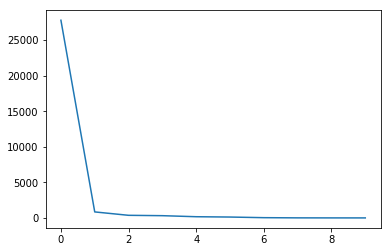

In [66]:
#Most of your variance is encoded in the first dimension
plt.plot(eigen)

In [67]:
happy_vector_dense = denseX[v['happy'],:]
sad_vector_dense = denseX[v['sad'],:]
angry_vector_dense = denseX[v['angry'],:]

In [68]:
happy_vector_dense

#How does a dense vector compare to a sparse vector?

array([ 6.45184408,  1.27241746, -0.98643437, -1.68605138, -0.9412401 ,
       -2.50753338, -0.77409843,  0.40240751,  0.51118598,  0.62237128])

In [69]:
happy_ww

array([0., 0., 0., ..., 0., 0., 0.])

## Vector Usages

There are several ways of working with vectors and the most useful for our purposes may be similarity. We will explore this further in the next section as well.


There are several ways to measure distance between two vectors. The most widely used is **cosine similarity**. This a cosine measure of angle between two vectors. Mathematically, cosine similarity looks like this:

$$cos(\vec{v}, \vec{w}) = \frac{dot(\vec{v},\vec{w})}{norm(\vec{v})norm(\vec{w})}$$

$$dot(\vec{v},\vec{w}) = \sum_{i=0}^{n}v_iw_i$$
$$norm(\vec{v}) = \sqrt{\sum_{i=0}^{n}v_i^2}$$

We normalize here because we want to normalize out frequency so that word similarity disregards frequency. 

Cosine similarity will range from 1 to -1. Closer to 1 means closer in direction, closer to -1 opposite in direction and something close to 0 means orthogonal.

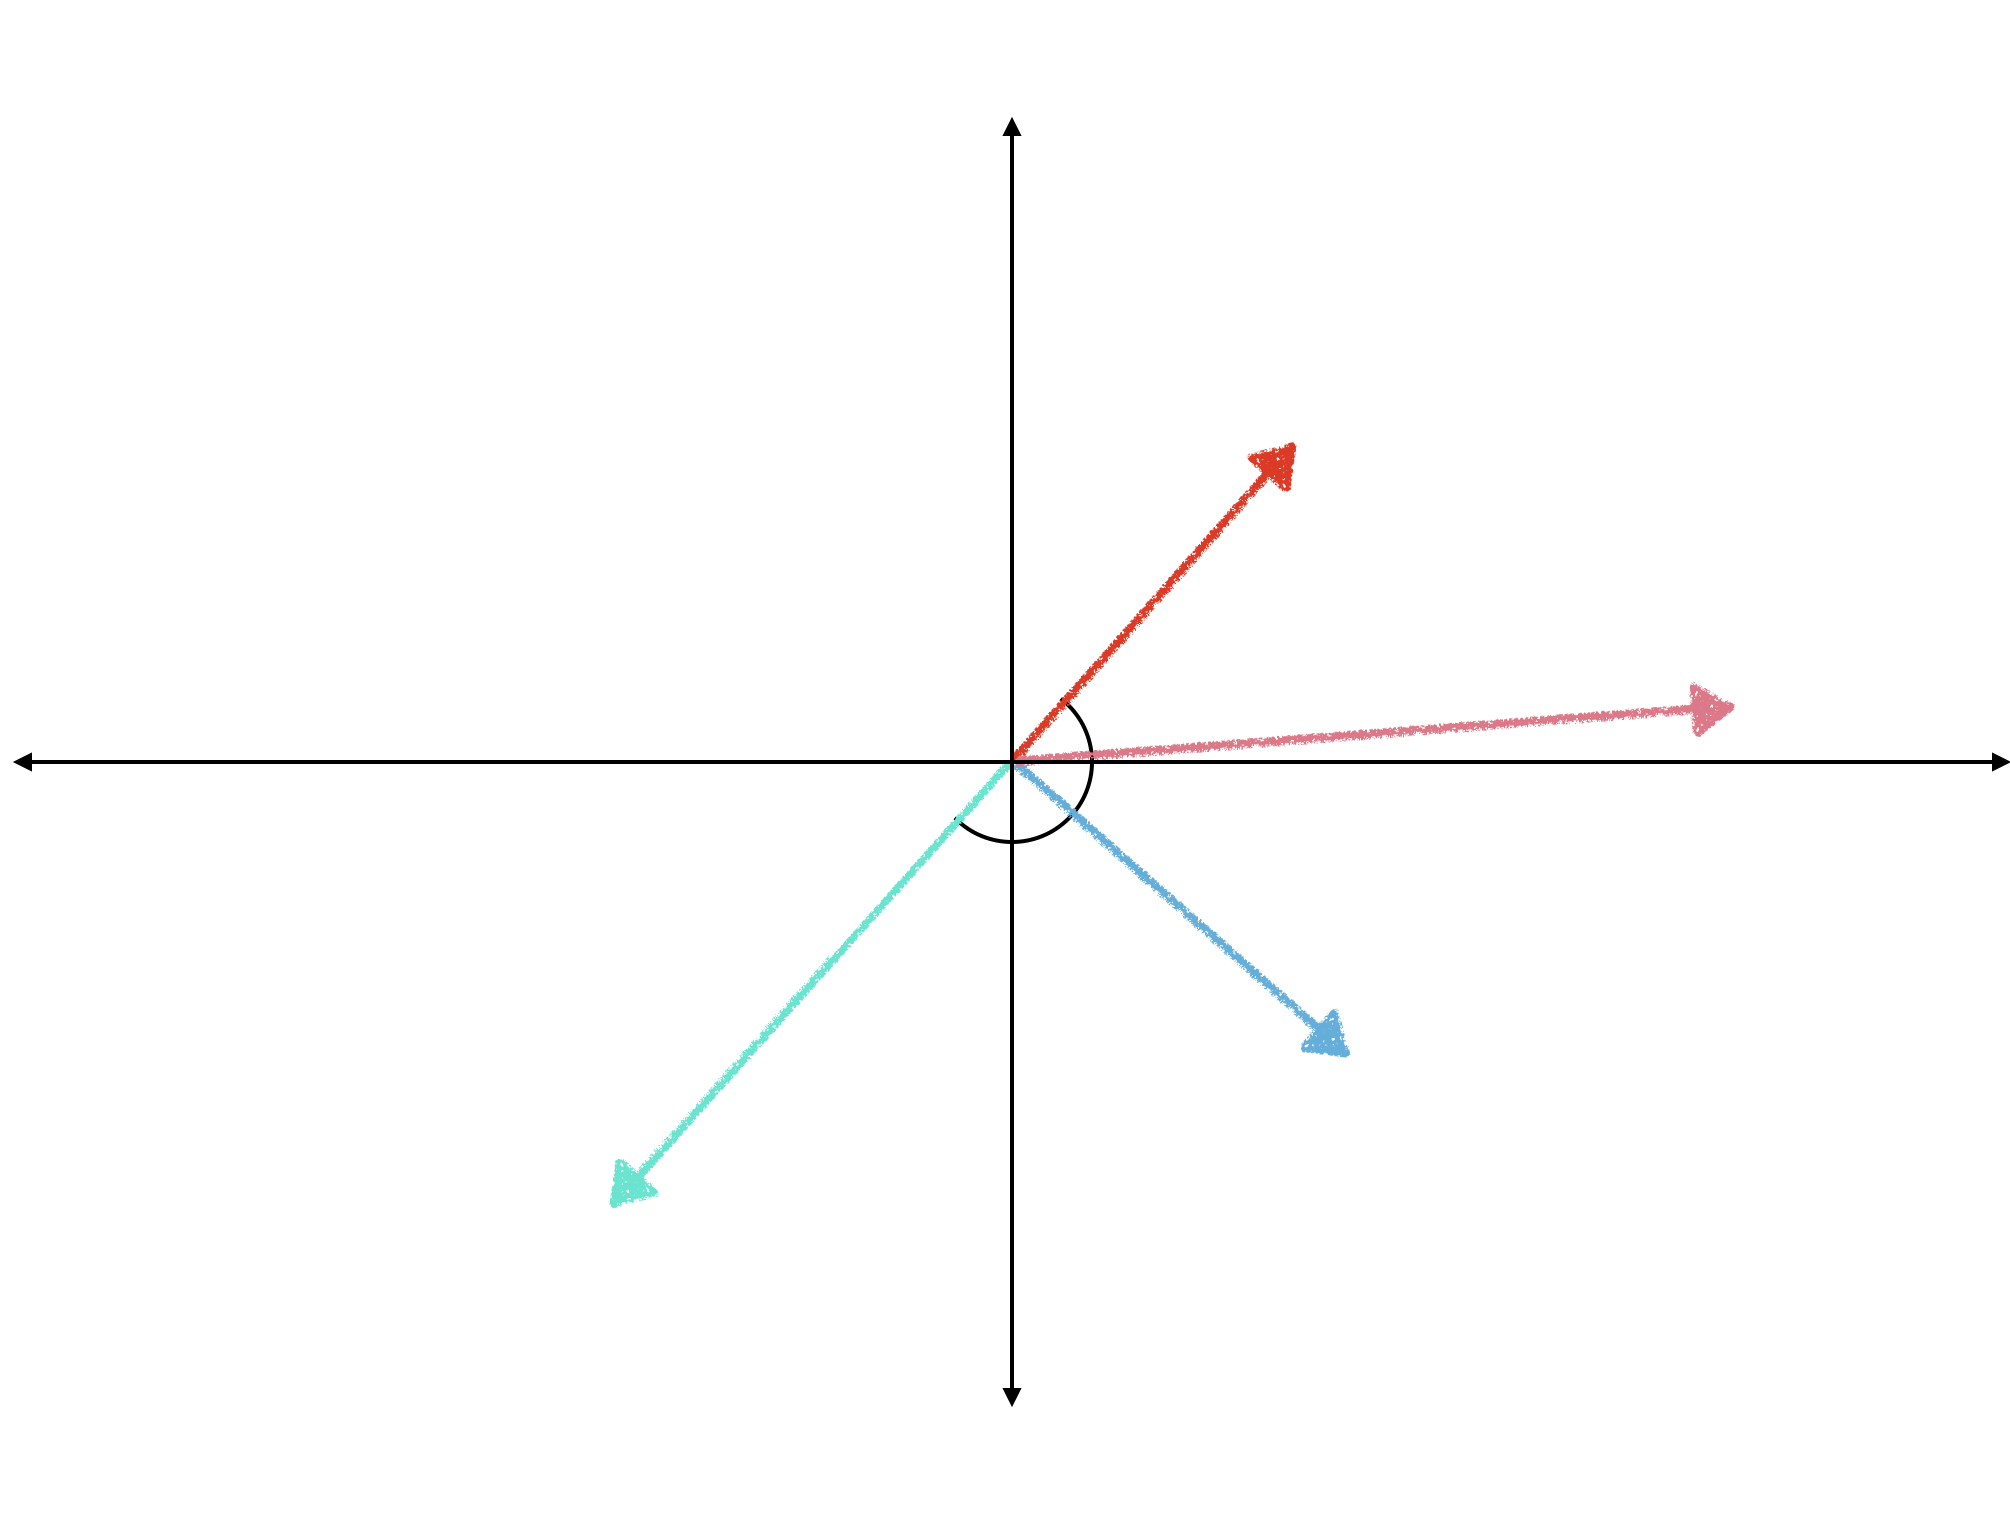

In [70]:
from IPython.display import Image
Image("./cosine.png")

In [71]:
from sklearn.metrics.pairwise import cosine_similarity 

In [72]:
# So that we can see more contrast when evaluating similarity, let's add in a rather different word: 'biscuit'

index = v['elated']
elated_vector_dense = denseX[index,:]

In [73]:
happy_vector = happy_vector_dense.reshape(1,-1) 
sad_vector = sad_vector_dense.reshape(1,-1)
angry_vector = angry_vector_dense.reshape(1,-1)
elated_vector = elated_vector_dense.reshape(1,-1)

In [74]:
#angle between happy and sad
cosine_similarity(happy_vector, sad_vector)

array([[0.84350213]])

In [75]:
cosine_similarity(angry_vector, sad_vector)

array([[0.37024197]])

In [76]:
cosine_similarity(happy_vector, angry_vector)

array([[0.43307629]])

In [77]:
cosine_similarity(happy_vector, elated_vector)

array([[0.76731915]])

In [78]:
whale_i = v['whale']
harpoon_i = v['harpoon']
boat_i = v['boat']
blood_i = v['blood']
cosine_similarity(denseX[boat_i,:].reshape(1,-1), denseX[harpoon_i,:].reshape(1,-1))

array([[0.98148407]])

In [79]:
#Activity: Compare similarity of vectors of your choice!

Using similarity as a method, we can also cluster similar vectors together. 
This is called **clustering** and **k-means** is one popular clustering algorithm. 

K-means is an iterative algorithm that finds clusters of similar vectors by first assigning observations to their nearest means (initially randomly chosen) as its cluster and then calculating the new centroids of these clusters. 

It is called k-means because you are splitting all of your observations into k clusters by their means. 

Let's work with a small set of words



In [80]:
selection = ['green','blue','dark','yellow','bright','round','tiny','slim','square','black','thin']

In [81]:
#iterate through all of these words to make a matrix
select_matrix = []
for word in selection:
    word_id = v[word]
    select_matrix.append(denseX[word_id,:])
select_matrix = np.array(select_matrix)
select_matrix

array([[49.88610093, -3.64117179,  6.58335817, ...,  1.7528481 ,
        -0.19185053,  2.57452114],
       [41.2332221 , -1.89398138,  4.22757192, ..., -1.19320665,
         0.54038306, -0.39707747],
       [60.01065478, -0.60469234,  0.34920182, ...,  2.86818293,
         1.55937202, -0.55309844],
       ...,
       [ 8.92497395, -0.37269306, -0.89145676, ...,  0.36897661,
        -2.29300944,  0.93953395],
       [79.75264925,  4.56902703,  4.59202564, ..., -0.98687185,
         5.11123774,  1.0477108 ],
       [17.74117923,  4.61474735,  0.96449102, ..., -0.37987439,
         1.49191824, -0.93075194]])

In [82]:
np.array(select_matrix).shape

(11, 10)

In [83]:
from sklearn.cluster import KMeans

In [84]:
kmeans = KMeans(n_clusters=3)

In [85]:
np.set_printoptions(threshold=20)
predictions = kmeans.fit_predict(select_matrix)
predictions

array([2, 2, 2, 0, 0, 1, 0, 0, 0, 2, 0], dtype=int32)

## Visualization 

You have probably heard of **t-sne** (is it TEA SNEA? or TAE SNAE..)!  This is "newer" dimension reduction method that emphasizes visual convenience. Sometimes PCA can produce overlapping/crowding of similar points. The con of tsne is that it is not as easily interpretable as PCA (we'll use that in part2). It's also non-deterministic -- you'll get different but similar results everytime. But we thought you should play with it here since it has been widely used in machine learning today.

In [86]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2) #n-components = reduced dimensions
X

array([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
       [ 1.,  2., 84., ...,  0.,  0.,  0.],
       [ 1., 84.,  4., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [87]:
#Let's make a matrix of 50 random words
random_indices = np.random.choice(len(v), 50, replace=False)
select_matrix = X[random_indices]
lookup = {val:key for key,val in v.items()}
labels = [lookup[w] for w in random_indices]

In [88]:
select_matrix.shape

(50, 20755)

In [89]:
labels

['translation',
 'whitenesses',
 'IV',
 'VERSION',
 'fissure',
 'regular',
 'population',
 'herring-shoals',
 'graven',
 'boxes',
 'are',
 'Pannangians',
 'unusual',
 'countenance',
 'burst',
 'dishes',
 'opportunities',
 'Vengeance',
 'helmet',
 'mail',
 'Giver',
 'contents',
 'mature',
 'chamber',
 'bandbox',
 'woodland',
 'acridness',
 'magnets',
 'half-suspended',
 'Manx',
 'slender',
 'letter-bag',
 'mid-watch',
 'hold',
 'cycloid',
 'paw',
 'wherewith',
 'subtleness',
 'male',
 'outwards',
 'intervened',
 'remotest',
 'immutable',
 'Praetorians',
 'MARBLE',
 'whaleship',
 'oil-ladle',
 'Poland',
 'clime',
 'interblending']

In [90]:
embed = tsne.fit_transform(select_matrix)

In [91]:
embed

array([[ 14.6603565,  18.701172 ],
       [-24.178633 , -28.711199 ],
       [103.19766  ,  44.045166 ],
       ...,
       [ 39.37866  ,  89.930695 ],
       [-18.703642 , -51.992607 ],
       [-74.80693  , -11.504052 ]], dtype=float32)

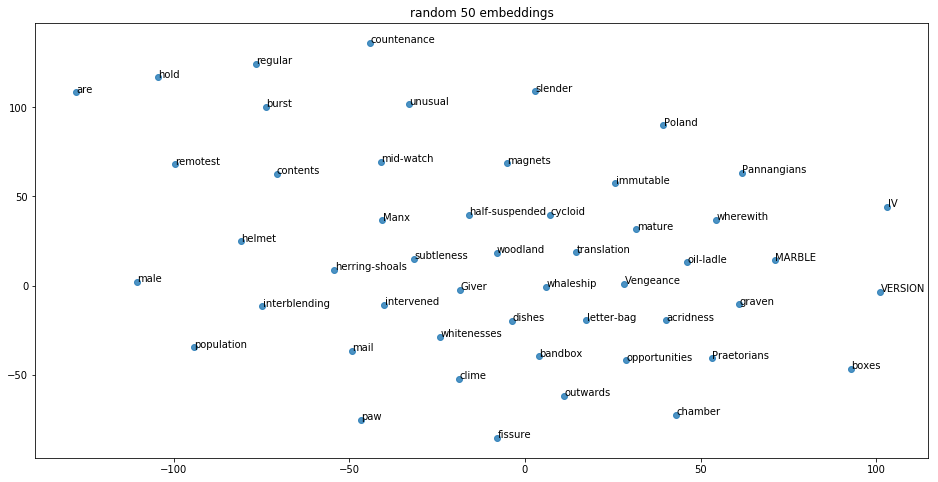

In [92]:
random_x, random_y = zip(*embed)
fig, ax = plt.subplots(figsize=(16, 8))
ax.scatter(random_x, random_y, alpha=.8)

for _, lab in enumerate(labels):
    ax.annotate(lab, (random_x[_]+.1, random_y[_]-.05))

plt.title("random 50 embeddings")
plt.show()

Now, let's do this with the entire set for fun...

In [93]:
tsne = TSNE(n_components=2)

In [94]:
embed = tsne.fit_transform(denseX)
random_x, random_y = zip(*embed)

Text(0.5,1,'tsne visual of all 20755 word embeddings')

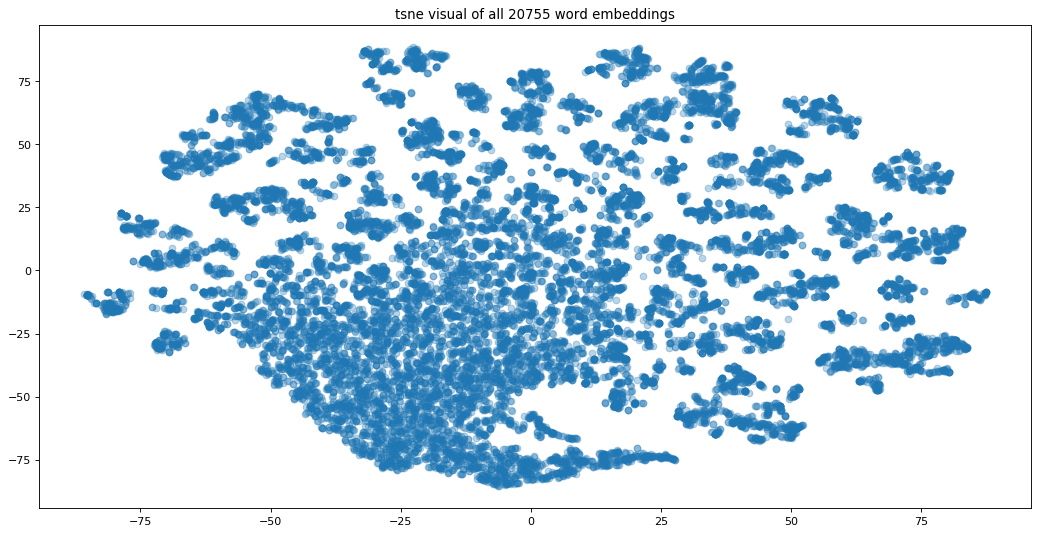

In [95]:
plt.figure(figsize=(16, 8), dpi=80)
plt.scatter(random_x, random_y, alpha=0.3)
plt.title("tsne visual of all " +str(len(v)) + " word embeddings")